In this notebook, we are using **Logistic Regression** to build a model that predicts whether a patient has heart disease based on various health indicators.

**Here's how it applies:**

**Binary Classification**: Logistic Regression is well-suited for problems like this where the outcome is binary (either the patient has heart disease or not).

**Probability Prediction:** The model estimates the probability of a patient having heart disease based on their input features.

**Decision Boundary:** Based on the calculated probability, the model makes a prediction (0 or 1) by setting a decision boundary (usually 0.5). If the probability is above the boundary, it predicts one class; otherwise, it predicts the other.

**Training:** The logr.fit(x_train, y_train) step trains the model using the training data (x_train and y_train). The model learns the relationship between the features and the target variable.

**Prediction:** Once trained, the model can make predictions on new, unseen data (new_patient_data) using logr.predict().



---


**import pandas as pd:** Essential for data manipulation and working with DataFrames, used here to load and manage the dataset.

**import matplotlib.pyplot as plt:** Used for creating visualizations (though not used in the current cells).

**from sklearn.linear_model import LogisticRegression:** Imports the class for building the logistic regression model to predict heart disease.

**from sklearn.metrics import accuracy_score, confusion_matrix:**  Imports functions to evaluate the model's performance: accuracy_score for overall correctness and confusion_matrix for a detailed breakdown of predictions.

**from sklearn.model_selection import train_test_split:** Imports the function to split the data into training and testing sets, ensuring the model is evaluated on unseen data.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

This line reads the data from the "heart.csv" file into a pandas DataFrame named data.


In [5]:
data = pd.read_csv("heart.csv")

Gives the Data of First 10 lines

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Below two lines prepare the data for training the model by separating the features (independent variables) from the target variable (dependent variable):

**x = data.drop(columns="target").copy():** This line creates a new DataFrame x by dropping the "target" column from the original data DataFrame. The drop() method removes the specified column, and columns="target" ensures that it's a column being dropped. .copy() is used to create a shallow copy of the DataFrame, ensuring that any modifications to x do not affect the original data DataFrame. x now contains all the independent variables that will be used to predict the target.

**y = data["target"].copy():** This line creates a new Series y containing only the "target" column from the original data DataFrame. This column represents the dependent variable, which is what we are trying to predict (whether or not a patient has heart disease). .copy() is used here as well to create a copy of the Series.

In the context of machine learning, x represents the independent variables (features) that are used as input to the model, and y represents the dependent variable (target) that the model aims to predict.

In [12]:
x=data.drop(columns="target").copy()
y=data["target"].copy()

x_train, x_test, y_train, y_test: These are the variables that will store the resulting subsets of the data.
x_train and y_train will be used to train the model, while x_test and y_test will be used to evaluate its performance on unseen data.

train_test_split(x, y, ...): This calls the train_test_split function, passing in the features (x) and the target variable (y).

test_size=0.25: This parameter specifies the proportion of the dataset that should be allocated to the test set. In this case, 25% of the data will be used for testing, and the remaining 75% will be used for training.

random_state=33: This parameter is used to set a seed for the random number generator. Using a random_state ensures that the data split is the same every time the code is run, which is important for reproducibility.





In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

Below lines initialize and train the Logistic Regression model:

logr = LogisticRegression(): This line creates an instance of the LogisticRegression class and assigns it to the variable logr. This is where we create our logistic regression model object.

logr.fit(x_train, y_train): This is the training step. The fit() method trains the logistic regression model using the training data. x_train contains the features (independent variables) of the training set, and y_train contains the corresponding target values (dependent variable). During this step, the model learns the relationship between the features and the target variable, determining the coefficients and intercept that best fit the training data.

You might have noticed a ConvergenceWarning when running this cell. This warning indicates that the optimization algorithm used by LogisticRegression (by default, 'lbfgs') failed to converge within the maximum number of iterations. This doesn't necessarily mean the model is bad, but it suggests that the optimization process might not have found the absolute best set of parameters. To address this, you could try increasing the maximum number of iterations by setting the max_iter parameter in LogisticRegression() (e.g., logr = LogisticRegression(max_iter=1000)), or consider scaling your data.

In [16]:
logr = LogisticRegression()
logr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Below line uses the trained logistic regression model (logr) to make predictions on the test set features (x_test).

logr.predict(x_test): The predict() method of the trained LogisticRegression model takes the features of the test set as input and outputs the predicted target values (in this case, whether or not each patient in the test set is predicted to have heart disease).
y_pred = ...: The predicted values are then stored in the variable y_pred. This y_pred variable contains the model's predictions for the heart disease status of each patient in the test set, based on the features provided in x_test.

In [17]:
y_pred=logr.predict(x_test)

Below line calculates the confusion matrix, which is a table that summarizes the performance of a classification model.

confusion_matrix(y_test, y_pred): This function compares the true target values from the test set (y_test) with the predicted target values from the model (y_pred) and generates a confusion matrix.
Confusion Matrix Explained:

A confusion matrix helps visualize the performance of a classification algorithm. The table shows the number of:

True Negatives (TN): Correctly predicted negative cases (patients without heart disease who were predicted as not having heart disease).
False Positives (FP): Incorrectly predicted positive cases (patients without heart disease who were predicted as having heart disease - Type I error).
False Negatives (FN): Incorrectly predicted negative cases (patients with heart disease who were predicted as not having heart disease - Type II error).
True Positives (TP): Correctly predicted positive cases (patients with heart disease who were predicted as having heart disease).

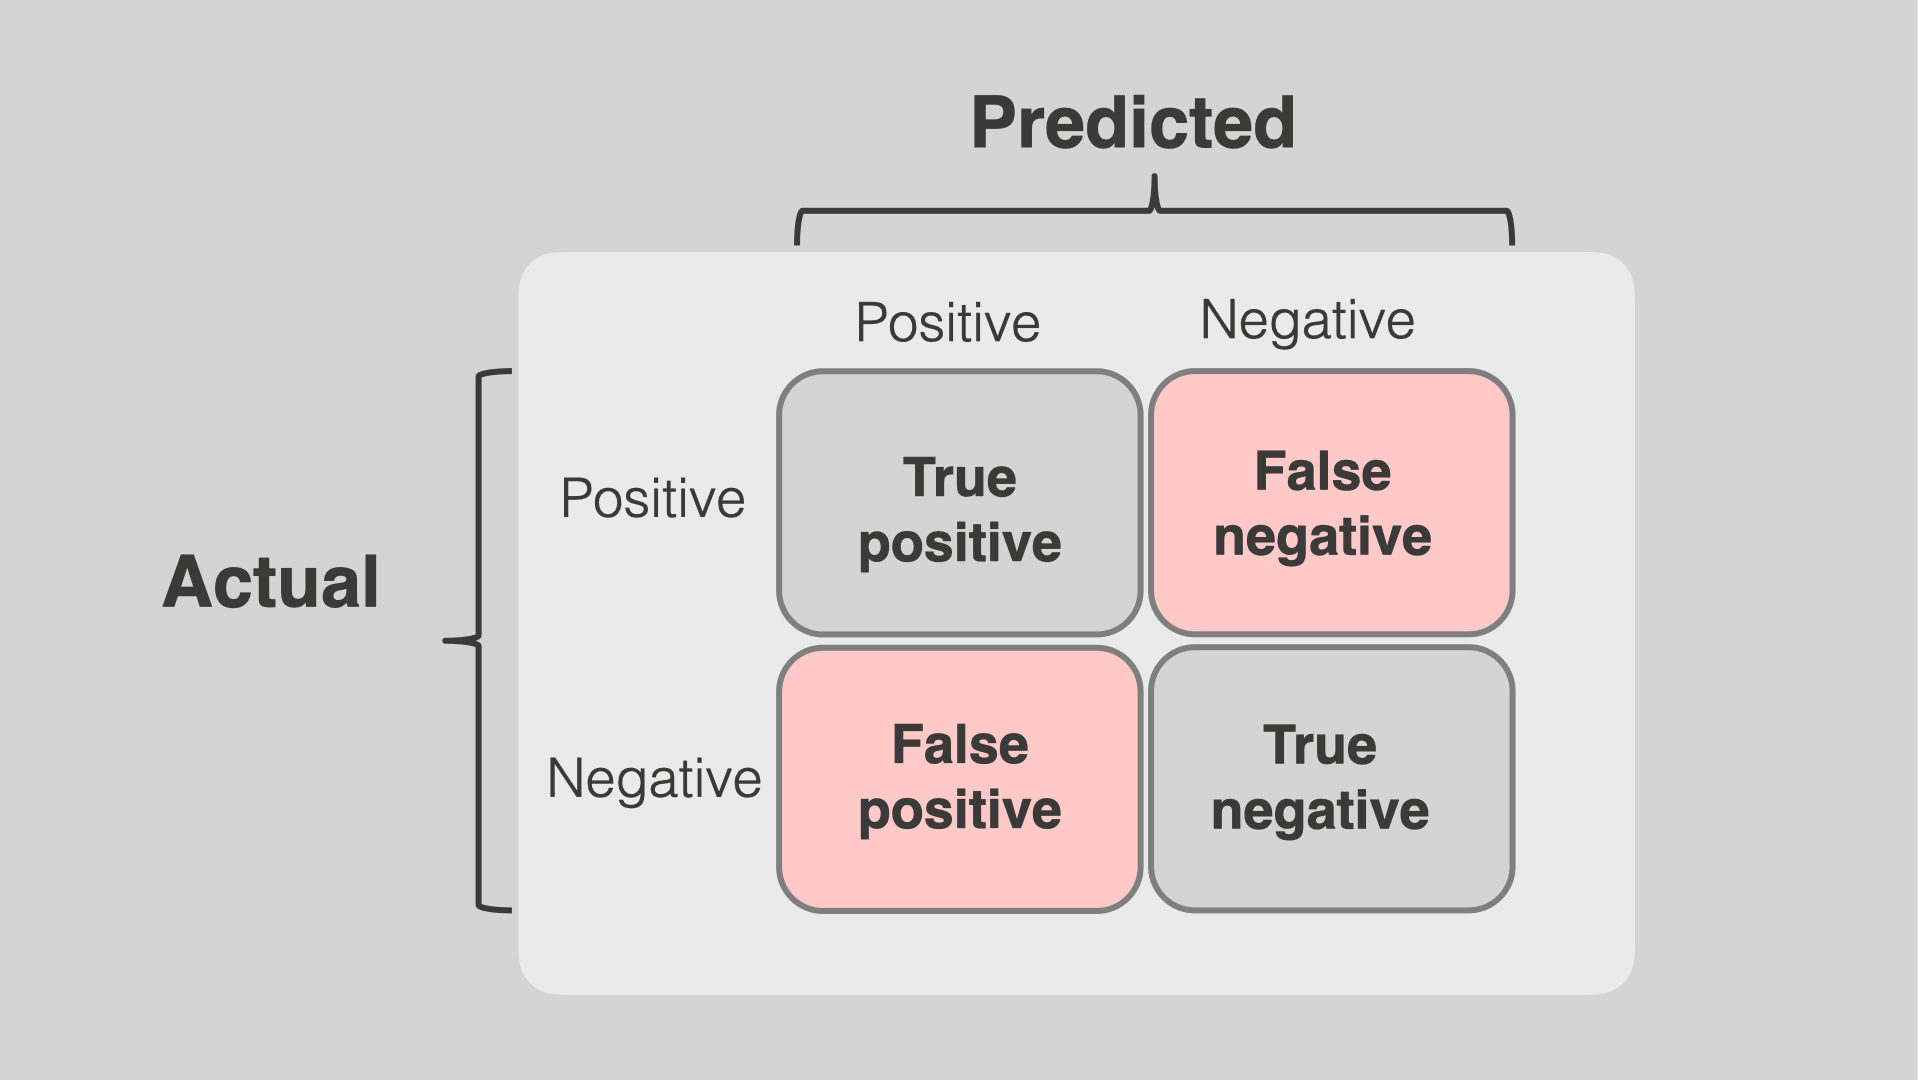

In [ ]:
confusion_matrix(y_test,y_pred)

Below line calculates the accuracy of the model's predictions using the accuracy_score function:

accuracy_score(y_test, y_pred): This function compares the true target values from the test set (y_test) with the predicted target values from the model (y_pred). It calculates the proportion of correctly predicted instances.
Definition:

Accuracy is the proportion of the total number of predictions that were correct. It is a common metric for evaluating classification models.

Formula:

The formula for accuracy is:

Accuracy=Number of Correct PredictionsTotal Number of Predictions

In terms of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) from a confusion matrix, the formula is:

Accuracy=TP + TN / TP + TN + FP + FN

The output of the cell, 0.8482490272373541, indicates that the model correctly predicted the heart disease status for approximately 84.8% of the patients in the test set.

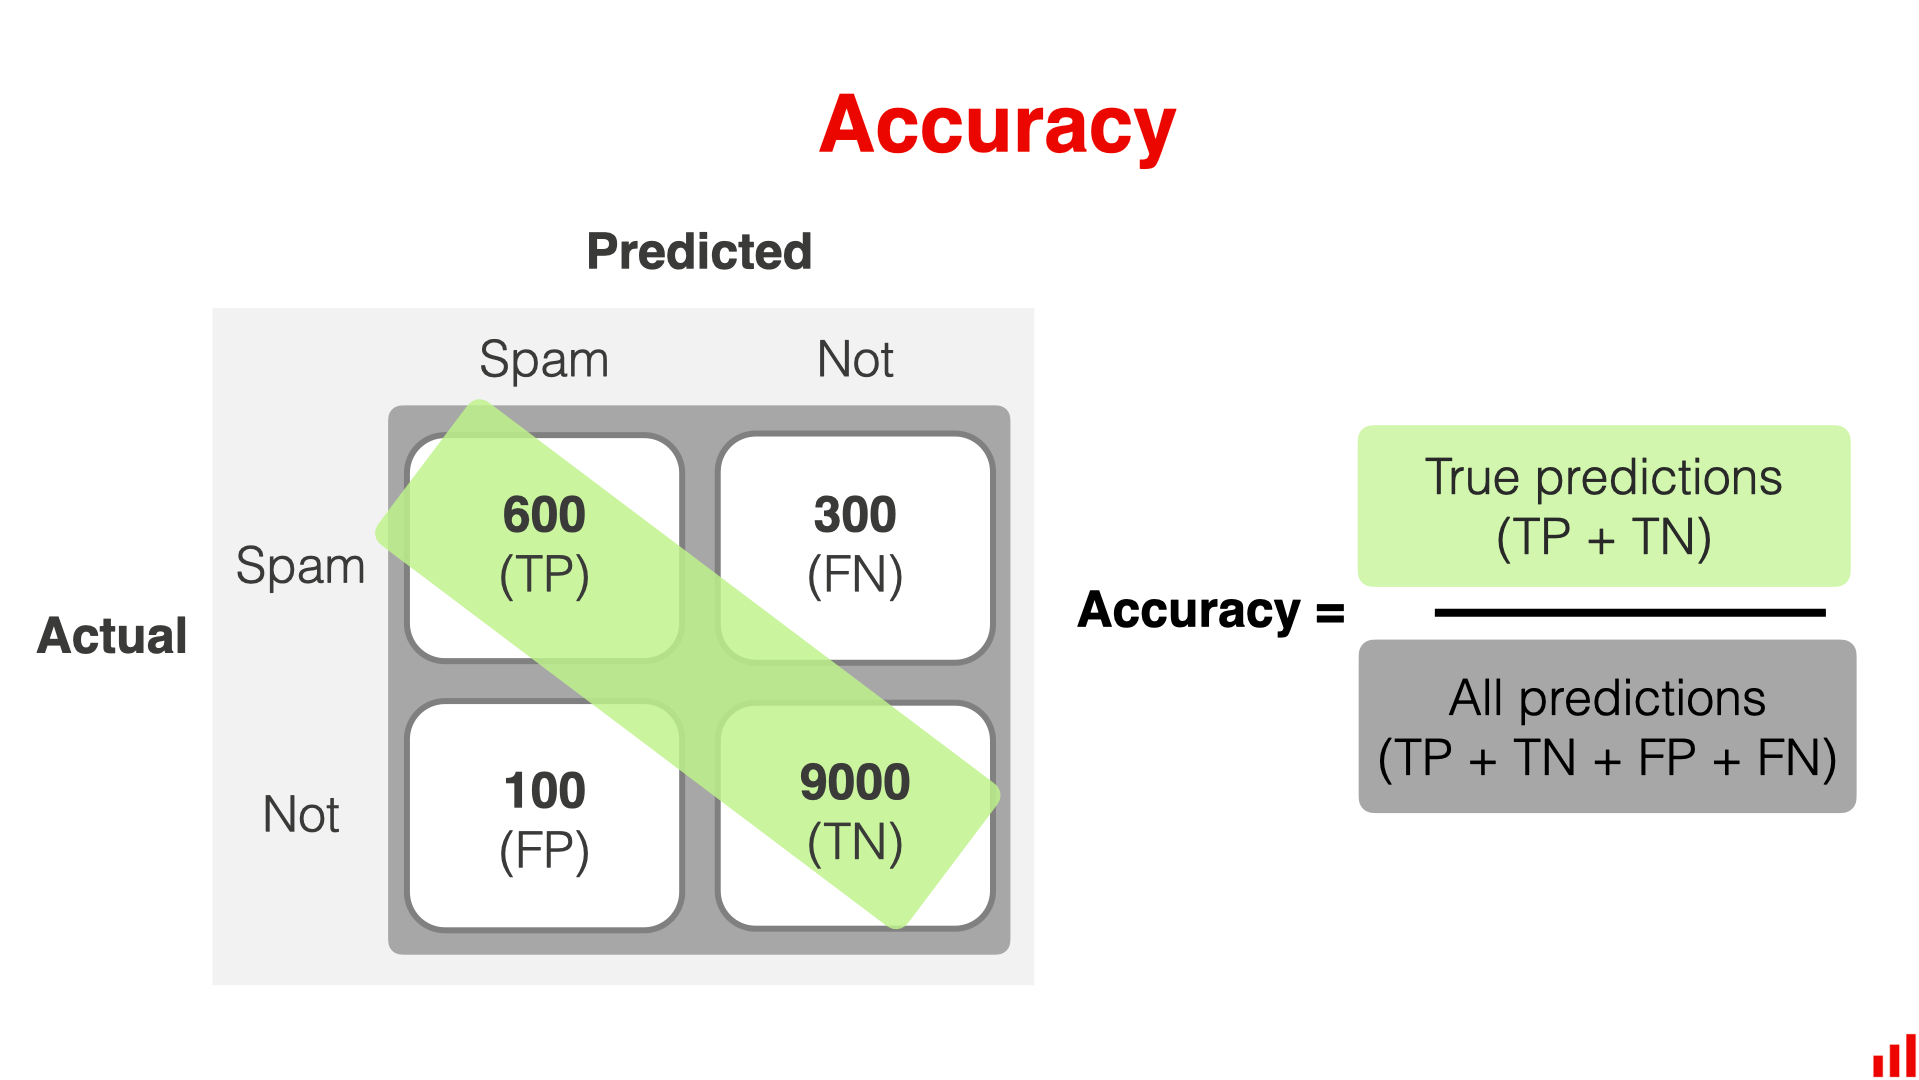

In [24]:
accuracy_score(y_test,y_pred)

0.8482490272373541

This code block creates a pandas DataFrame to store the data for a new patient, collecting input for each feature used in the model:

new_patient_data = pd.DataFrame([{...}]): This creates a new pandas DataFrame with a single row, which will hold the data for the new patient. The data is provided as a list containing a single dictionary, where each key is a feature name and the value is the input collected from the user.
For each feature, the code prompts the user to enter a value using the input() function. The input is then converted to the appropriate data type (int or float) before being added to the DataFrame. The prompts now include the expected ranges for some of the features to guide the user during input.

This collected data is then used to make a prediction using the trained logistic regression model.

In [33]:
new_patient_data = pd.DataFrame([{
    'age': int(input("Enter age: ")),
    'sex': int(input("Enter sex (0 for female, 1 for male): ")),
    'cp': int(input("Enter chest pain type (0-3): ")),
    'trestbps': int(input("Enter resting blood pressure (94.0-200.0): ")),
    'chol': int(input("Enter cholesterol level (126.0-564.0): ")),
    'fbs': int(input("Enter fasting blood sugar (>120 mg/dl = 1, else 0): ")),
    'restecg': int(input("Enter resting electrocardiographic results (0-2): ")),
    'thalach': int(input("Enter maximum heart rate achieved (71.0-202.0): ")),
    'exang': int(input("Enter exercise induced angina (1 for yes, 0 for no): ")),
    'oldpeak': float(input("Enter ST depression induced by exercise relative to rest (0.0-6.2): ")),
    'slope': int(input("Enter the slope of the peak exercise ST segment (0-2): ")),
    'ca': int(input("Enter number of major vessels (0-3) colored by flourosopy: ")),
    'thal': int(input("Enter thal type (1-3): "))
}])

Enter age: 22
Enter sex (0 for female, 1 for male): 1
Enter chest pain type (0-3): 3
Enter resting blood pressure: 150
Enter cholesterol level: 200
Enter fasting blood sugar (>120 mg/dl = 1, else 0): 1
Enter resting electrocardiographic results (0-2): 2
Enter maximum heart rate achieved: 200
Enter exercise induced angina (1 for yes, 0 for no): 1
Enter ST depression induced by exercise relative to rest: 2
Enter the slope of the peak exercise ST segment (0-2): 2
Enter number of major vessels (0-3) colored by flourosopy: 3
Enter thal type (1-3): 3


Below line uses the trained logistic regression model (`logr`) to make a prediction on the data for the new patient.

*   `logr.predict(new_patient_data)`: The `predict()` method of the trained `LogisticRegression` model takes the `new_patient_data` DataFrame as input and outputs the predicted target value (in this case, whether or not the new patient is predicted to have heart disease).
*   `prediction = ...`: The predicted value is then stored in the variable `prediction`. This `prediction` variable will contain either `0` (indicating no heart disease) or `1` (indicating heart disease) based on the model's assessment of the new patient's data.

In [34]:
prediction = logr.predict(new_patient_data)

This code block checks the predicted value and prints a corresponding message:

*   `if prediction[0] == 0:`: This line checks if the first element of the `prediction` array is equal to 0. Since the `predict()` method returns an array (even for a single prediction), `prediction[0]` accesses the actual predicted value for the new patient. If the predicted value is 0, it means the model predicts that the patient does **not** have heart disease.
*   `print("Don't Worry Dear you're safe")`: If the condition in the `if` statement is true (prediction is 0), this line prints the message "Don't Worry Dear you're safe".
*   `else:`: This indicates the alternative case, which is when the condition in the `if` statement is false (i.e., the predicted value is not 0). Since the target variable is binary (0 or 1), the only other possibility is that the predicted value is 1.
*   `print("Hurry! Rush to Hospital")`: If the predicted value is 1, this line prints the message "Hurry! Rush to Hospital", indicating that the model predicts the patient **does** have heart disease.

In [35]:
if prediction[0]== 0:
  print("Don't Worry Dear you're safe")
else:
  print("Hurry! Rush to Hospital")

Hurry! Rush to Hospital
